Act 2. Color segmentation

Olivia Bianelli Navarrete Carrasco- A01654903

Primer metodo

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2 as cv


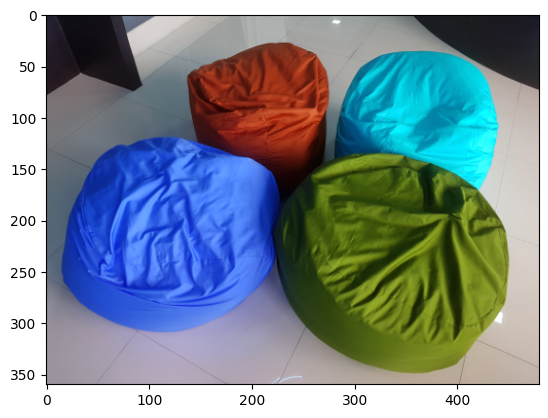

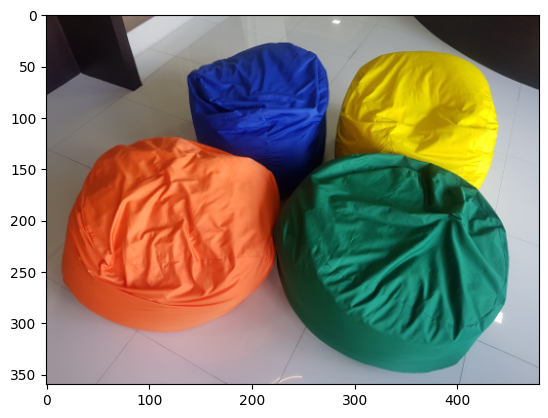

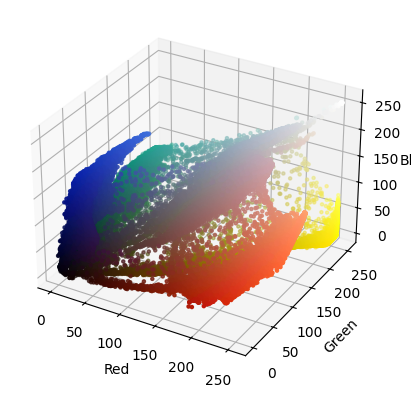

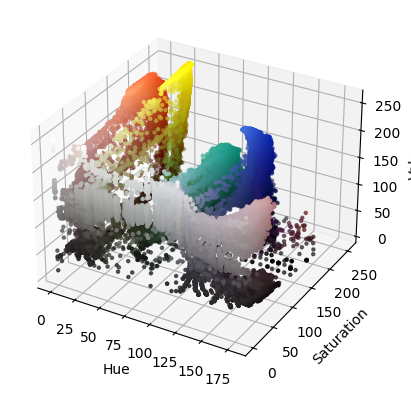

In [95]:
img = cv.imread("bags.png") 
plt.imshow(img)
plt.show()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection = "3d")
pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors = pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()
hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
h,s,v = cv.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(), facecolors = pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()



BAG VERDE


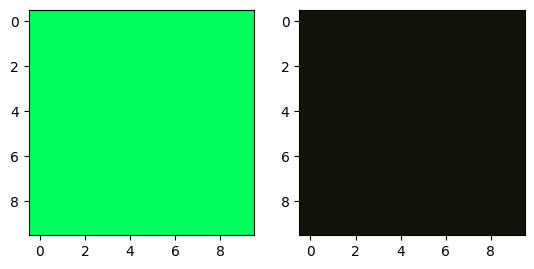

In [96]:
light_green= ( 100,255, 255)
dark_green = (62,110,20)


from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10,10,3), light_green,dtype=np.uint8)/255.0
do_square = np.full((10,10,3), dark_green, dtype=np.uint8)/255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

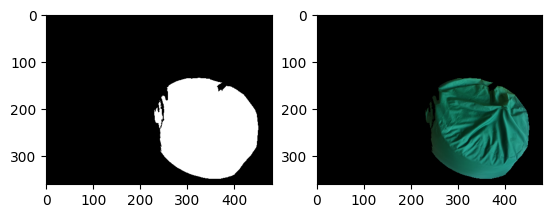

In [97]:
mask = cv.inRange(hsv_img,dark_green,light_green)
result_verde = cv.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result_verde)
plt.show()

BAG AMARILLA

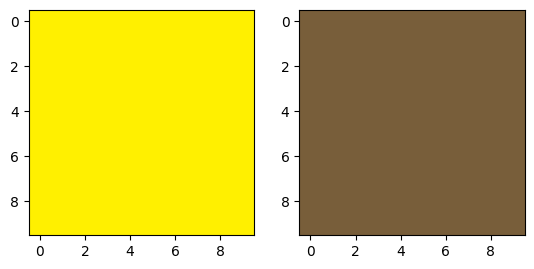

In [98]:
light_yellow = (40,255,255)
dark_yellow = (25,130,120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10,10,3), light_yellow,dtype=np.uint8)/255.0
do_square = np.full((10,10,3), dark_yellow, dtype=np.uint8)/255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

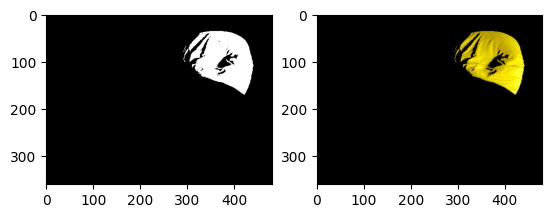

In [99]:
mask = cv.inRange(hsv_img,dark_yellow,light_yellow)
result_amarillo = cv.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result_amarillo)
plt.show()

BAG AZUL

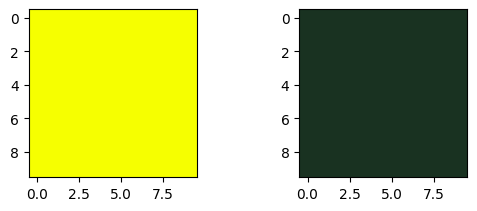

In [100]:

light_blue = (300,255,255)
dark_blue = (100,127,50)

lb_square = np.full((10,10,3), light_blue,dtype=np.uint8)/255.0
db_square = np.full((10,10,3), dark_blue, dtype=np.uint8)/255.0
plt.subplot(2,2,1)
plt.imshow(hsv_to_rgb(lb_square))
plt.subplot(2,2,2)
plt.imshow(hsv_to_rgb(db_square))
plt.show()


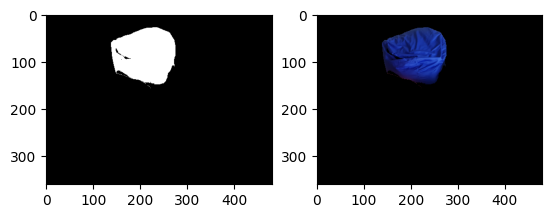

In [101]:
mask = cv.inRange(hsv_img,dark_blue,light_blue)
result_azul = cv.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result_azul)
plt.show()

BAG NARANJA 

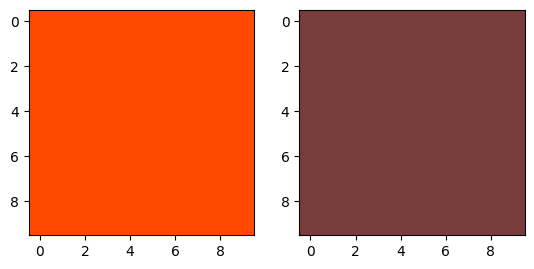

In [102]:
light_red = (12,255,255) 
dark_red = (0,127,120)


from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10,10,3), light_red,dtype=np.uint8)/255.0
do_square = np.full((10,10,3), dark_red, dtype=np.uint8)/255.0
plt.subplot(1,2,1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

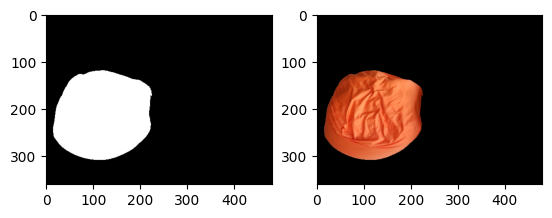

In [103]:
mask = cv.inRange(hsv_img,dark_red,light_red)
result_naranja = cv.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result_naranja)
plt.show()

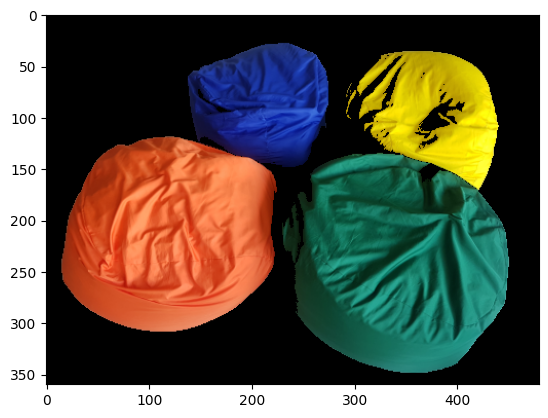

In [104]:
Total= (result_azul+result_amarillo+result_naranja+result_verde)
plt.imshow(Total)
plt.show()

Segundo Metodo

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2 as cv
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

BAG AMARILLA

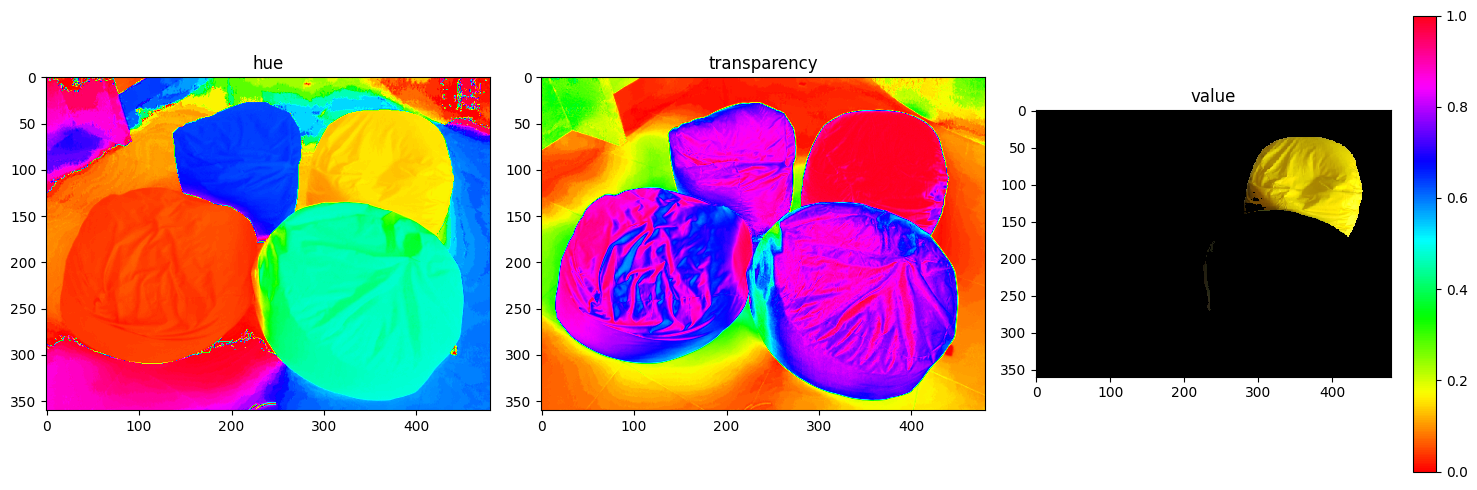

In [106]:
img = cv.imread("bags.png") 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#otro metodo para hacer la mascara y para hacer lo de cv2
hsv_img = rgb2hsv(img)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')

ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')

ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')

fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv'))
fig.tight_layout()
#refer to hue channel (in the colorbar)
lower_mask = hsv_img[:,:,0] > 0.1

#refer to hue channel (in the colorbar)
upper_mask = hsv_img[:,:,0] < 0.2

#refer to tranparency channel (in the colorbar)
saturation_mask = hsv_img[:,:,1] > 0.4

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked_amarilla = np.dstack((red,green,blue))
imshow(img_masked_amarilla)


plt.show()


BAG VERDE

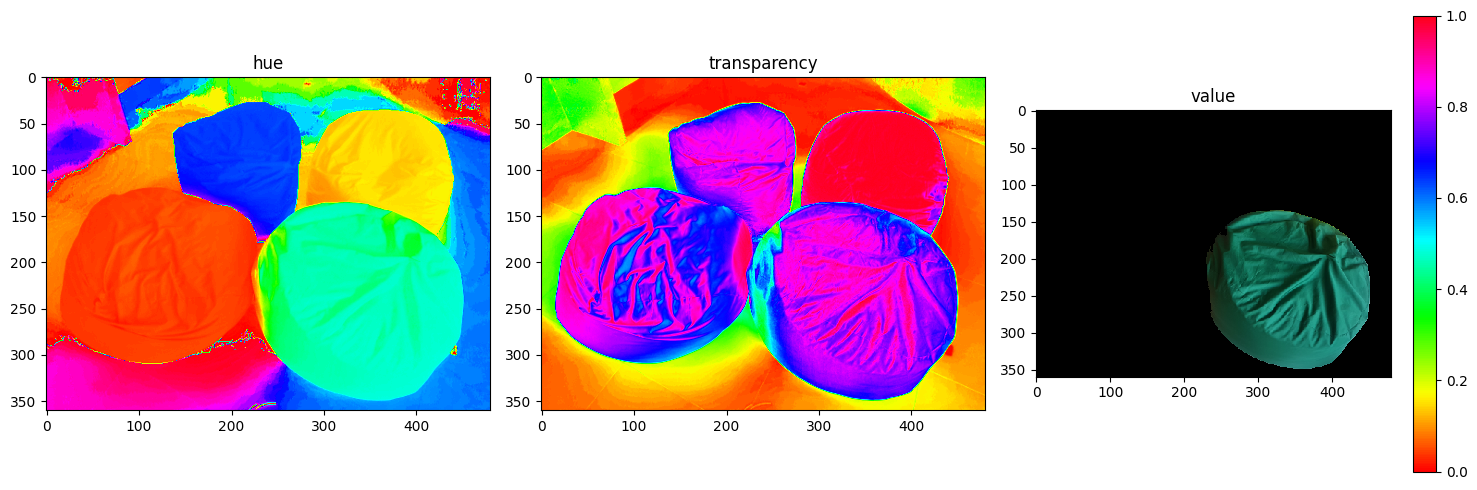

In [107]:
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')

ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')

ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')


fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv'))
fig.tight_layout()
#refer to hue channel (in the colorbar)
lower_mask = hsv_img[:,:,0] > 0.2

#refer to hue channel (in the colorbar)
upper_mask = hsv_img[:,:,0] < 0.5
#refer to tranparency channel (in the colorbar)
saturation_mask = hsv_img[:,:,1] > 0.3

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked_verde = np.dstack((red,green,blue))
imshow(img_masked_verde)
plt.show()


BAG AZUL

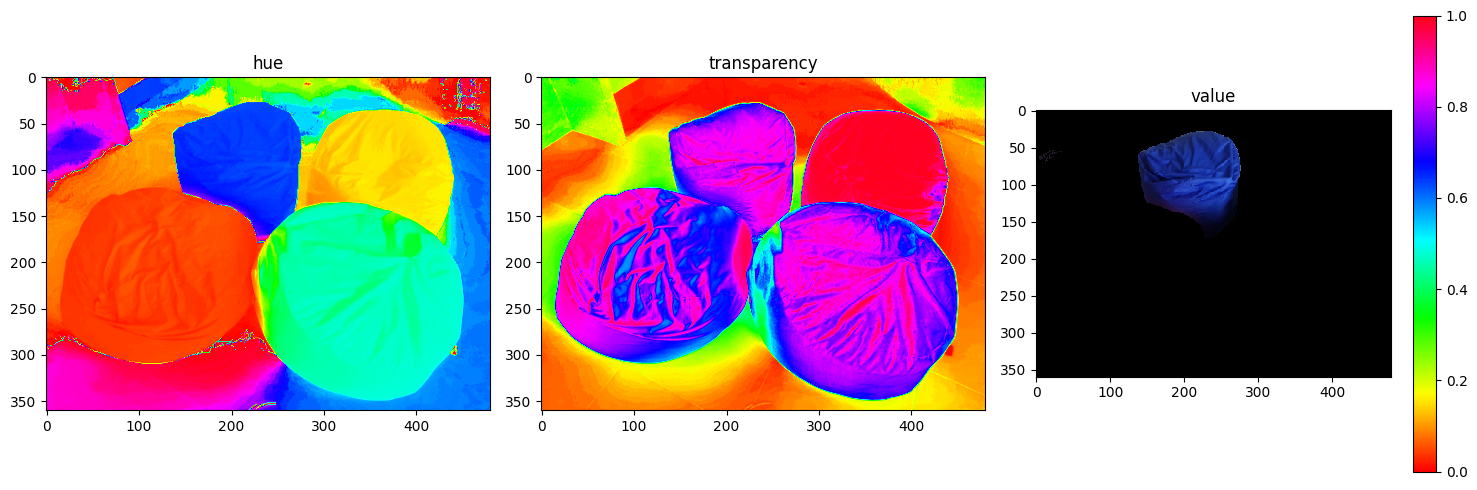

In [108]:
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')

ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')

ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')


fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv'))
fig.tight_layout()
#refer to hue channel (in the colorbar)
lower_mask = hsv_img[:,:,0] > 0.6

#refer to hue channel (in the colorbar)
upper_mask = hsv_img[:,:,0] < 0.8

#refer to tranparency channel (in the colorbar)
saturation_mask = hsv_img[:,:,1] > 0.3

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked_azul = np.dstack((red,green,blue))
imshow(img_masked_azul)

plt.show()


BAG NARANJA

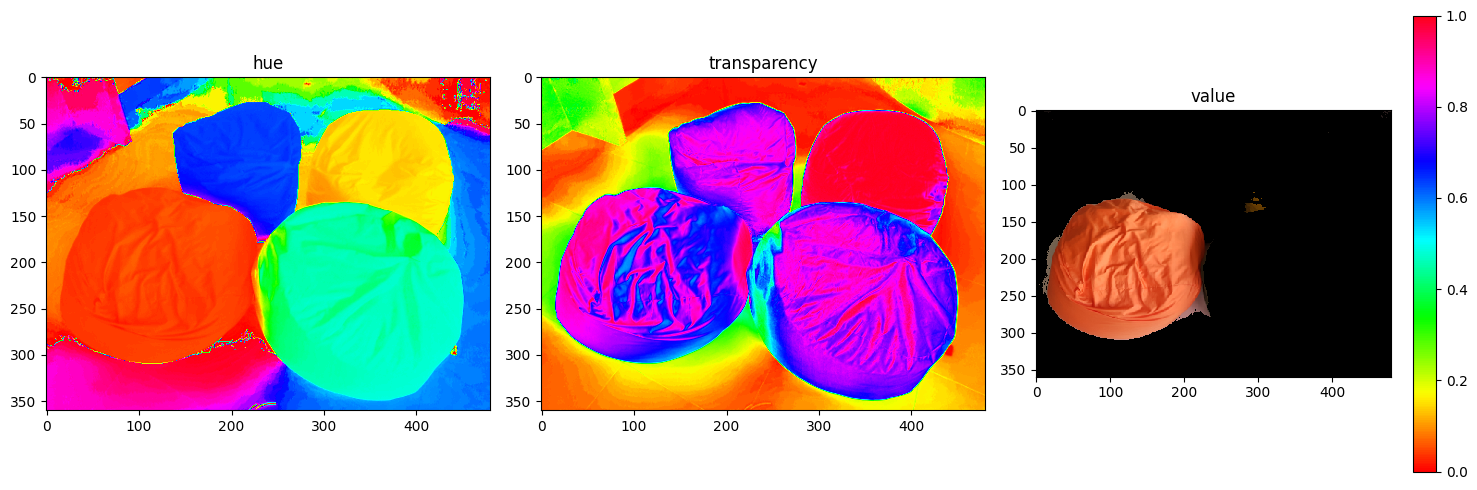

In [113]:
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')

ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')

ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')


fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv'))
fig.tight_layout()
#refer to hue channel (in the colorbar)
lower_mask = hsv_img[:,:,0] > 0.0

#refer to hue channel (in the colorbar)
upper_mask = hsv_img[:,:,0] < 0.1

#refer to tranparency channel (in the colorbar)
saturation_mask = hsv_img[:,:,1] > 0.3

mask2 = upper_mask*lower_mask*saturation_mask
red = img[:,:,0]*mask2
green = img[:,:,1]*mask2
blue = img[:,:,2]*mask2
img_masked_naranja = np.dstack((red,green,blue))
imshow(img_masked_naranja)

plt.show()

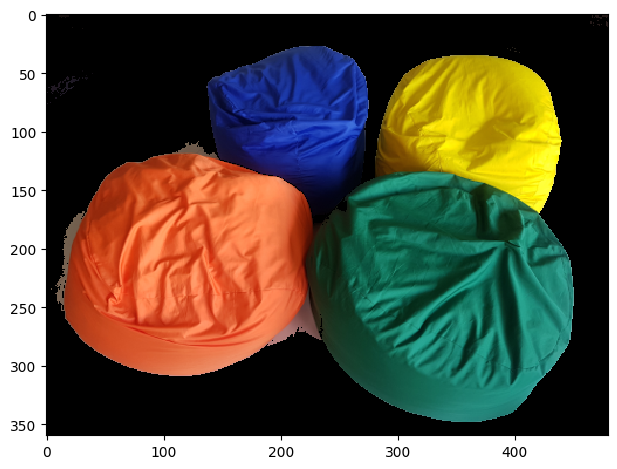

In [110]:
todo = ( img_masked_amarilla + img_masked_azul + img_masked_naranja + img_masked_verde)
imshow(todo)

plt.show()